
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [7]:
df = pd.read_csv('advertising.csv')

**Check the head of ad_data**

In [9]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


** Use info and describe() on ad_data**

In [16]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


<Axes: >

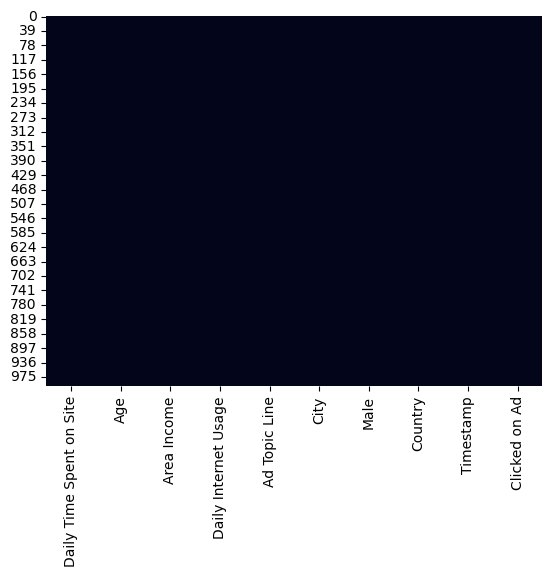

In [20]:
sns.heatmap(df.isnull(), cbar= False) ##no null values

## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

<Axes: xlabel='Age', ylabel='Count'>

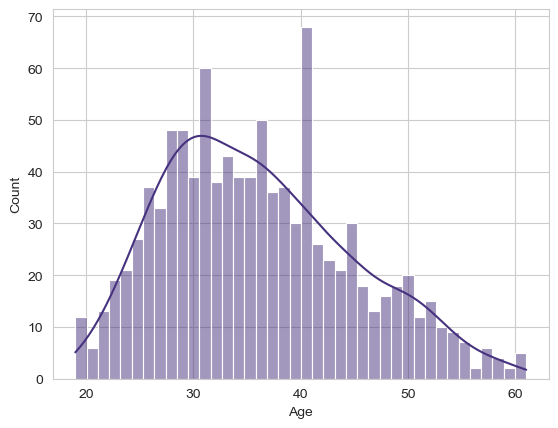

In [38]:
##
sns.set_style(style = "whitegrid")
sns.set_palette(palette = "viridis")
sns.histplot(df, x = 'Age', bins = 40, kde = True) ## little skewed distribution

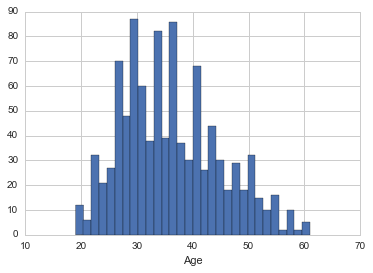

**Create a jointplot showing Area Income versus Age.**

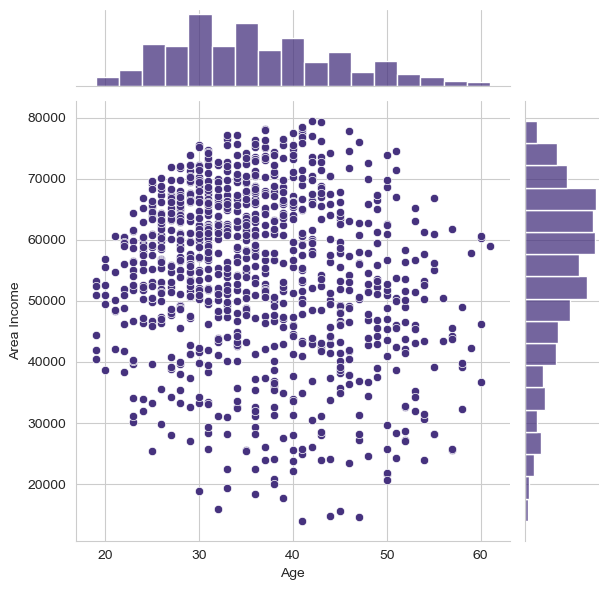

In [43]:
sns.jointplot(df, x = 'Age', y = 'Area Income')

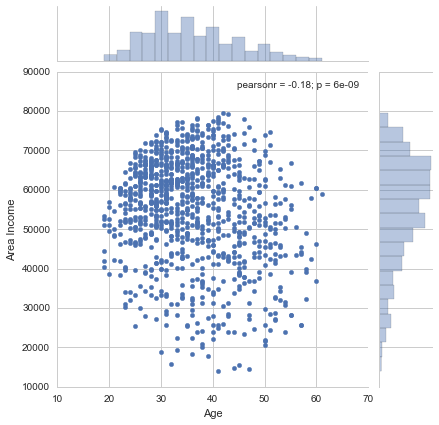

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

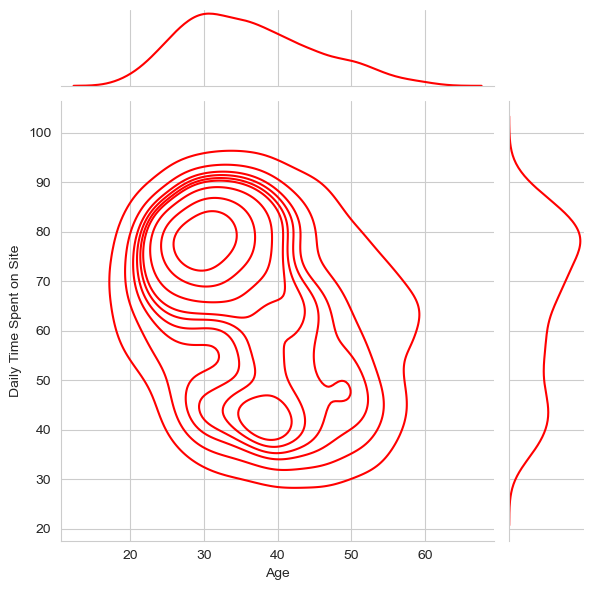

In [61]:
sns.jointplot(df, x = 'Age', y = 'Daily Time Spent on Site', kind= "kde", color = "red", palette= "rocket")

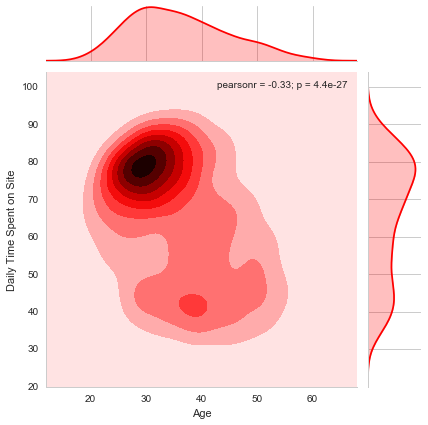

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

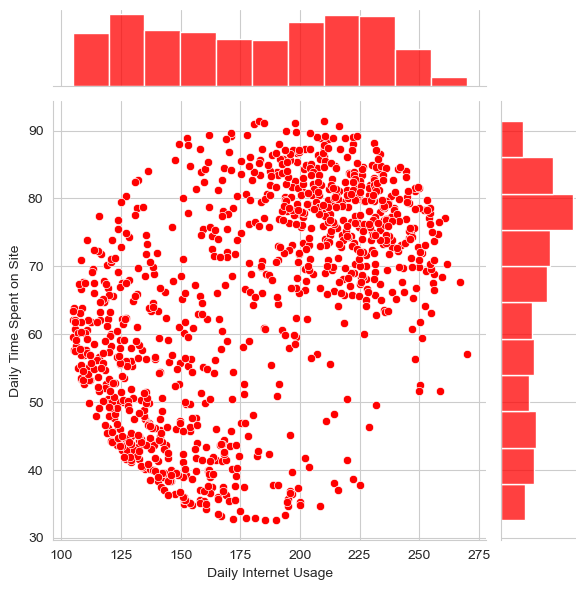

In [63]:
sns.jointplot(df, x = 'Daily Internet Usage', y = 'Daily Time Spent on Site', kind= "scatter", color = "red", palette= "rocket")

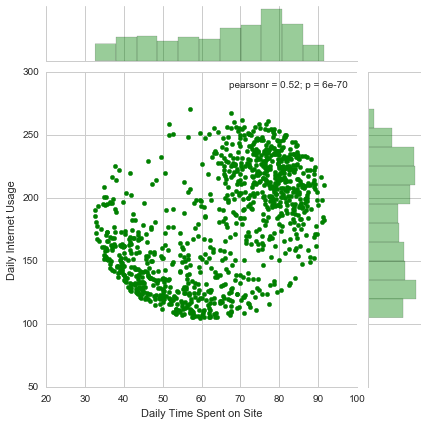

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

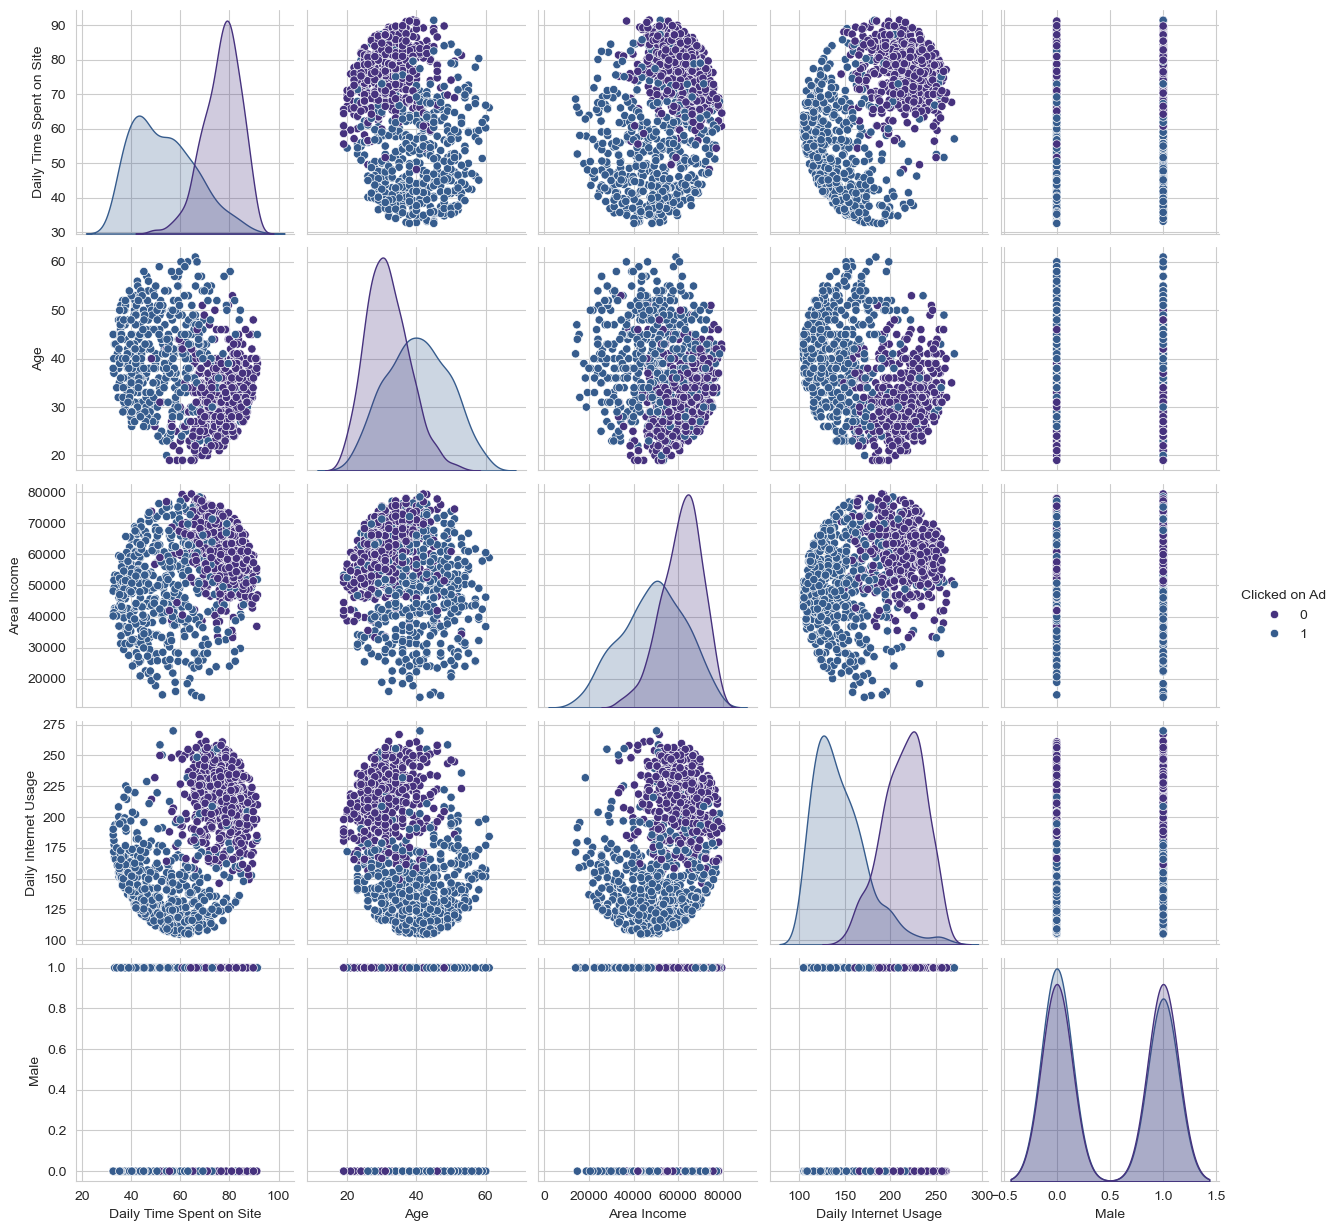

In [70]:
sns.pairplot(df , hue = 'Clicked on Ad')

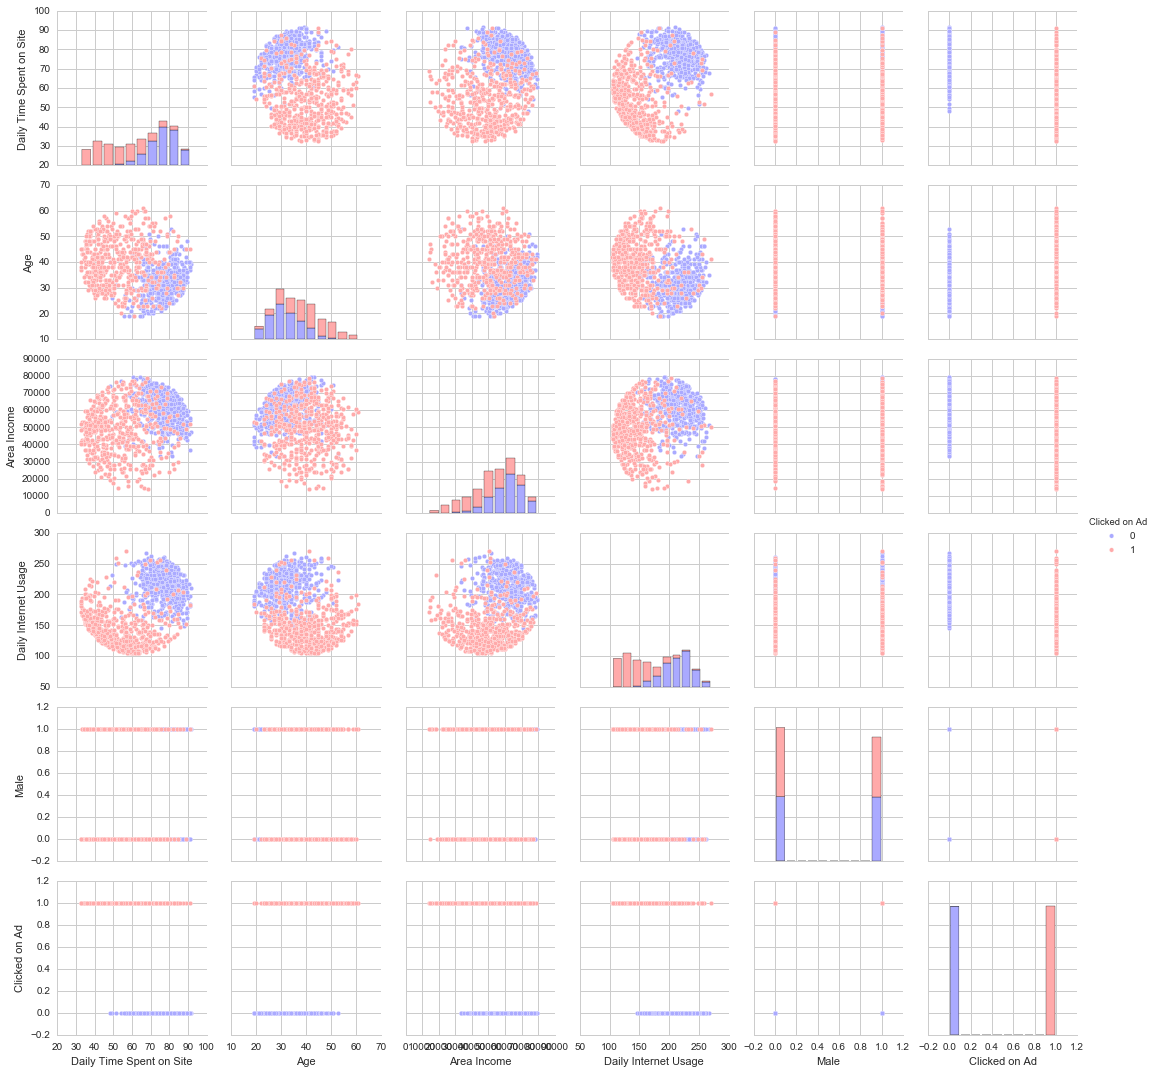

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OrdinalEncoder, StandardScaler

In [74]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [78]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [82]:
X_Re = df.loc[:, df.columns.isin(['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])]
scaling = StandardScaler()
X_Scaled = scaling.fit_transform(X_Re)

In [90]:
X_Scaled_df = pd.DataFrame(X_Scaled, columns = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'])

##It's betetr to not use country & state
df.groupby(['Country']).size().sort_values(ascending = False)[df.groupby(['Country']).size().sort_values(ascending = False) > 5] ## City, country hace too many variation
# df.sort_values(

** Train and fit a logistic regression model on the training set.**

In [128]:
males = pd.get_dummies(df['Male'], columns = ['Male'], dtype = int, drop_first= True)

In [211]:
X = pd.concat([X_Scaled_df,males],axis =1).rename(columns = {1:"Male"})
Y = df[['Clicked on Ad']]['Clicked on Ad']

In [213]:
#DATA Split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size= 0.6, random_state=101)

X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size= 0.5, random_state=101)

# Hyper Parameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

In [215]:
para = {'penalty':['l1', 'l2', 'elasticnet', None],
       'C': [1,1.5,0.5,10,5,0.01], 
        'fit_intercept': [True, False],
       'solver': ['liblinear', 'lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']
        # 'max_iter': 1000
       }

model = LogisticRegression(max_iter= 1000)
grid = GridSearchCV(model, para, cv=5, scoring='f1')  # optimize for F1-score
grid.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1208: UserWarning: Setting penalty=No

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [1, 1.5, 0.5, 10, 5, 0.01],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='f1')

In [217]:
grid.best_score_

0.970382304378524

In [219]:
grid.best_params_

{'C': 1, 'fit_intercept': True, 'penalty': None, 'solver': 'lbfgs'}

In [221]:
Y_VAL_PRED = grid.predict(X_val)

In [223]:
from sklearn import metrics

# Validation Data Scores

In [225]:
print("Validation Data Statistics")
print("Accuracy Score: ",round(metrics.accuracy_score(y_val,Y_VAL_PRED),2)*100,"%")
print("F1 Score: ",round(metrics.f1_score(y_val,Y_VAL_PRED),2)*100,"%")
print("Recall Score: ",round(metrics.recall_score(y_val,Y_VAL_PRED),2)*100,"%")
print("Precision Score: ",round(metrics.precision_score(y_val,Y_VAL_PRED),2)*100,"%")
print("Mis-Classification %: ",round(1-(metrics.accuracy_score(y_val,Y_VAL_PRED)),2)*100,"%")

Validation Data Statistics
Accuracy Score:  97.0 %
F1 Score:  98.0 %
Recall Score:  96.0 %
Precision Score:  99.0 %
Mis-Classification %:  3.0 %


# * Train Data Scores 

In [232]:
Y_train_PRED = grid.predict(X_train)

In [236]:
print("Train Data Statistics")
print("Accuracy Score: ",round(metrics.accuracy_score(y_train,Y_train_PRED),2)*100,"%")
print("F1 Score: ",round(metrics.f1_score(y_train,Y_train_PRED),2)*100,"%")
print("Recall Score: ",round(metrics.recall_score(y_train,Y_train_PRED),2)*100,"%")
print("Precision Score: ",round(metrics.precision_score(y_train,Y_train_PRED),2)*100,"%")
print("Mis-Classification %: ",round(1-(metrics.accuracy_score(y_train,Y_train_PRED)),2)*100,"%")

Train Data Statistics
Accuracy Score:  97.0 %
F1 Score:  97.0 %
Recall Score:  96.0 %
Precision Score:  98.0 %
Mis-Classification %:  3.0 %


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [239]:
Y_test_PRED = grid.predict(X_test)

In [241]:
print("Test Data Statistics")
print("Accuracy Score: ",round(metrics.accuracy_score(y_test,Y_test_PRED),2)*100,"%")
print("F1 Score: ",round(metrics.f1_score(y_test,Y_test_PRED),2)*100,"%")
print("Recall Score: ",round(metrics.recall_score(y_test,Y_test_PRED),2)*100,"%")
print("Precision Score: ",round(metrics.precision_score(y_test,Y_test_PRED),2)*100,"%")
print("Mis-Classification %: ",round(1-(metrics.accuracy_score(y_test,Y_test_PRED)),2)*100,"%")

Test Data Statistics
Accuracy Score:  96.0 %
F1 Score:  96.0 %
Recall Score:  98.0 %
Precision Score:  95.0 %
Mis-Classification %:  4.0 %


In [94]:
## ON Unknown data as well model is working quite well

** Create a classification report for the model.**

In [244]:
metrics.classification_report(y_test,Y_test_PRED)

'              precision    recall  f1-score   support\n\n           0       0.98      0.96      0.97       112\n           1       0.95      0.98      0.96        88\n\n    accuracy                           0.96       200\n   macro avg       0.96      0.97      0.96       200\nweighted avg       0.97      0.96      0.97       200\n'

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



## Great Job!